# Multiple Hypothesis Testing Correction

In [8]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (10, 10), 'figure.dpi': 300}
)

from common.paths import PLS_RESULTS, RIDGE_RESULTS, CROSS_PRED_RESULTS
from common.results import load_results

from multipy.fwer import bonferroni
from multipy.fdr import lsu

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

### Manual Input

In [2]:
# bin_all = [0.0003, 0.0003, 0.0003, 0.0003, 0.0100, 0.0643]
# bin_1 = [0.0953, 0.0313, 0.0593, 0.6485, 0.6048, 0.8287]
# bin_2 = [0.0003, 0.0247, 0.0003, 0.0020, 0.0107, 0.4159]
# bin_3 = [0.1789, 0.0653, 0.3196, 0.4172, 0.2779, 0.3162]
# pvals = np.array(bin_all + bin_1 + bin_2 + bin_3)
pvals = np.array([0.3214, 0.0140, 0.0200, 0.5309, 0.1497, 0.4950])
df = pd.DataFrame({'Features': ['Feature {}'.format(i) for i in range(1, len(pvals) + 1)], 'P-value':pvals})
display(df)

,Features,P-value
0,Feature 1,0.3214
1,Feature 2,0.0140
2,Feature 3,0.0200
3,Feature 4,0.5309
4,Feature 5,0.1497
5,Feature 6,0.4950


### Within-Prediction

In [25]:
fn = 'ridge_pts_adhd_two_bins'
df, results_path = load_results(fn, RIDGE_RESULTS)
pvals = df['P-value']
display(df)

,Model,Population,Target,Bin,Alpha,Score,P-value
0,ridge,adhd,WISC_FSIQ,Bin 1,6401,0.320190,0.001996
1,ridge,adhd,WISC_FSIQ,Bin 2,9901,0.191331,0.025948
2,ridge,adhd,WISC_VSI,Bin 1,9901,0.313330,0.001996
3,ridge,adhd,WISC_VSI,Bin 2,9901,0.182058,0.031936
4,ridge,adhd,WISC_VCI,Bin 1,701,0.292524,0.001996
5,ridge,adhd,WISC_VCI,Bin 2,9901,0.219886,0.011976
6,ridge,adhd,WISC_FRI,Bin 1,9901,0.209537,0.009980
7,ridge,adhd,WISC_FRI,Bin 2,7301,0.186734,0.021956
8,ridge,adhd,WISC_WMI,Bin 1,1,0.100642,0.143713
9,ridge,adhd,WISC_WMI,Bin 2,1,0.150171,0.073852


### Cross-Prediction

In [2]:
fn = 'ridge_pts_age_cross_prediction.csv'
# fn = 'ridge_pts_diagnosis_cross_prediction (n=93).csv'
results_path = join(CROSS_PRED_RESULTS, fn)
df = pd.read_csv(results_path, index_col=0)
df = df.reset_index(drop=True)
pvals = df['P-value']
display(df)

,Model,Target,Train,Test,Score,P-value,Population,Num Permutations
0,ridge,WISC_FSIQ,Bin 1,Bin 1,0.250108,0.027944,adhd,500
1,ridge,WISC_FSIQ,Bin 1,Bin 2,0.328246,0.001996,adhd,500
2,ridge,WISC_FSIQ,Bin 1,Bin 3,0.202752,0.015968,adhd,500
3,ridge,WISC_FSIQ,Bin 2,Bin 2,0.348304,0.001996,adhd,500
4,ridge,WISC_FSIQ,Bin 2,Bin 3,0.250487,0.003992,adhd,500
5,ridge,WISC_FSIQ,Bin 2,Bin 1,0.358564,0.001996,adhd,500
6,ridge,WISC_FSIQ,Bin 3,Bin 3,0.031525,0.441118,adhd,500
7,ridge,WISC_FSIQ,Bin 3,Bin 1,0.216069,0.015968,adhd,500
8,ridge,WISC_FSIQ,Bin 3,Bin 2,0.290556,0.001996,adhd,500
9,ridge,WISC_VSI,Bin 1,Bin 1,0.252995,0.009980,adhd,500


## Run correction

In [26]:
a_threshold = 0.05
# df['BFR'] = bonferroni(pvals, alpha=a_threshold)
df['FDR'] = lsu(pvals, q=a_threshold)
display(df.round(4))

,Model,Population,Target,Bin,Alpha,Score,P-value,FDR
0,ridge,adhd,WISC_FSIQ,Bin 1,6401,0.3202,0.0020,True
1,ridge,adhd,WISC_FSIQ,Bin 2,9901,0.1913,0.0259,True
2,ridge,adhd,WISC_VSI,Bin 1,9901,0.3133,0.0020,True
3,ridge,adhd,WISC_VSI,Bin 2,9901,0.1821,0.0319,True
4,ridge,adhd,WISC_VCI,Bin 1,701,0.2925,0.0020,True
5,ridge,adhd,WISC_VCI,Bin 2,9901,0.2199,0.0120,True
6,ridge,adhd,WISC_FRI,Bin 1,9901,0.2095,0.0100,True
7,ridge,adhd,WISC_FRI,Bin 2,7301,0.1867,0.0220,True
8,ridge,adhd,WISC_WMI,Bin 1,1,0.1006,0.1437,False
9,ridge,adhd,WISC_WMI,Bin 2,1,0.1502,0.0739,False


## Save and update results file

In [27]:
df.to_csv(results_path)

## Get FDR q

In [18]:
m = len(pvals)
sort_ind = np.argsort(pvals)
qs = [(i+1.)*0.05/m for i, p in enumerate(pvals[sort_ind])]
a = pd.DataFrame([(p, q) for p, q in zip(pvals[sort_ind], qs)])
display(a)

,0,1
0,0.001996,0.000926
1,0.001996,0.001852
2,0.001996,0.002778
3,0.001996,0.003704
4,0.001996,0.004630
5,0.001996,0.005556
6,0.001996,0.006481
7,0.001996,0.007407
8,0.001996,0.008333
9,0.001996,0.009259


## Max Statistic Method

In [10]:
from common.binning import BIN_LABELS
from common.paths import RIDGE_PSCORES, PLS_PSCORES
from common.results import save_perm_score, load_perm_score
from common.wisc import WISC_LEVEL

model = 'ridge'
population = 'adhd'

for bin_label in BIN_LABELS:
    bin_perm_scores = []
    
    for target in WISC_LEVEL[5]:
        perm_score = load_perm_score(f'{model}_{population}_{target}_{bin_label}_perm_scores', RIDGE_PSCORES)
        bin_perm_scores.append(perm_score)
    
    bin_perm_scores = np.concatenate(bin_perm_scores)
    print(bin_label, bin_perm_scores.shape)
    save_perm_score(bin_perm_scores, f'{model}_{population}_{bin_label}_perm_scores', RIDGE_PSCORES)

All (3000,)
Bin 1 (3000,)
Bin 2 (3000,)
Bin 3 (3000,)


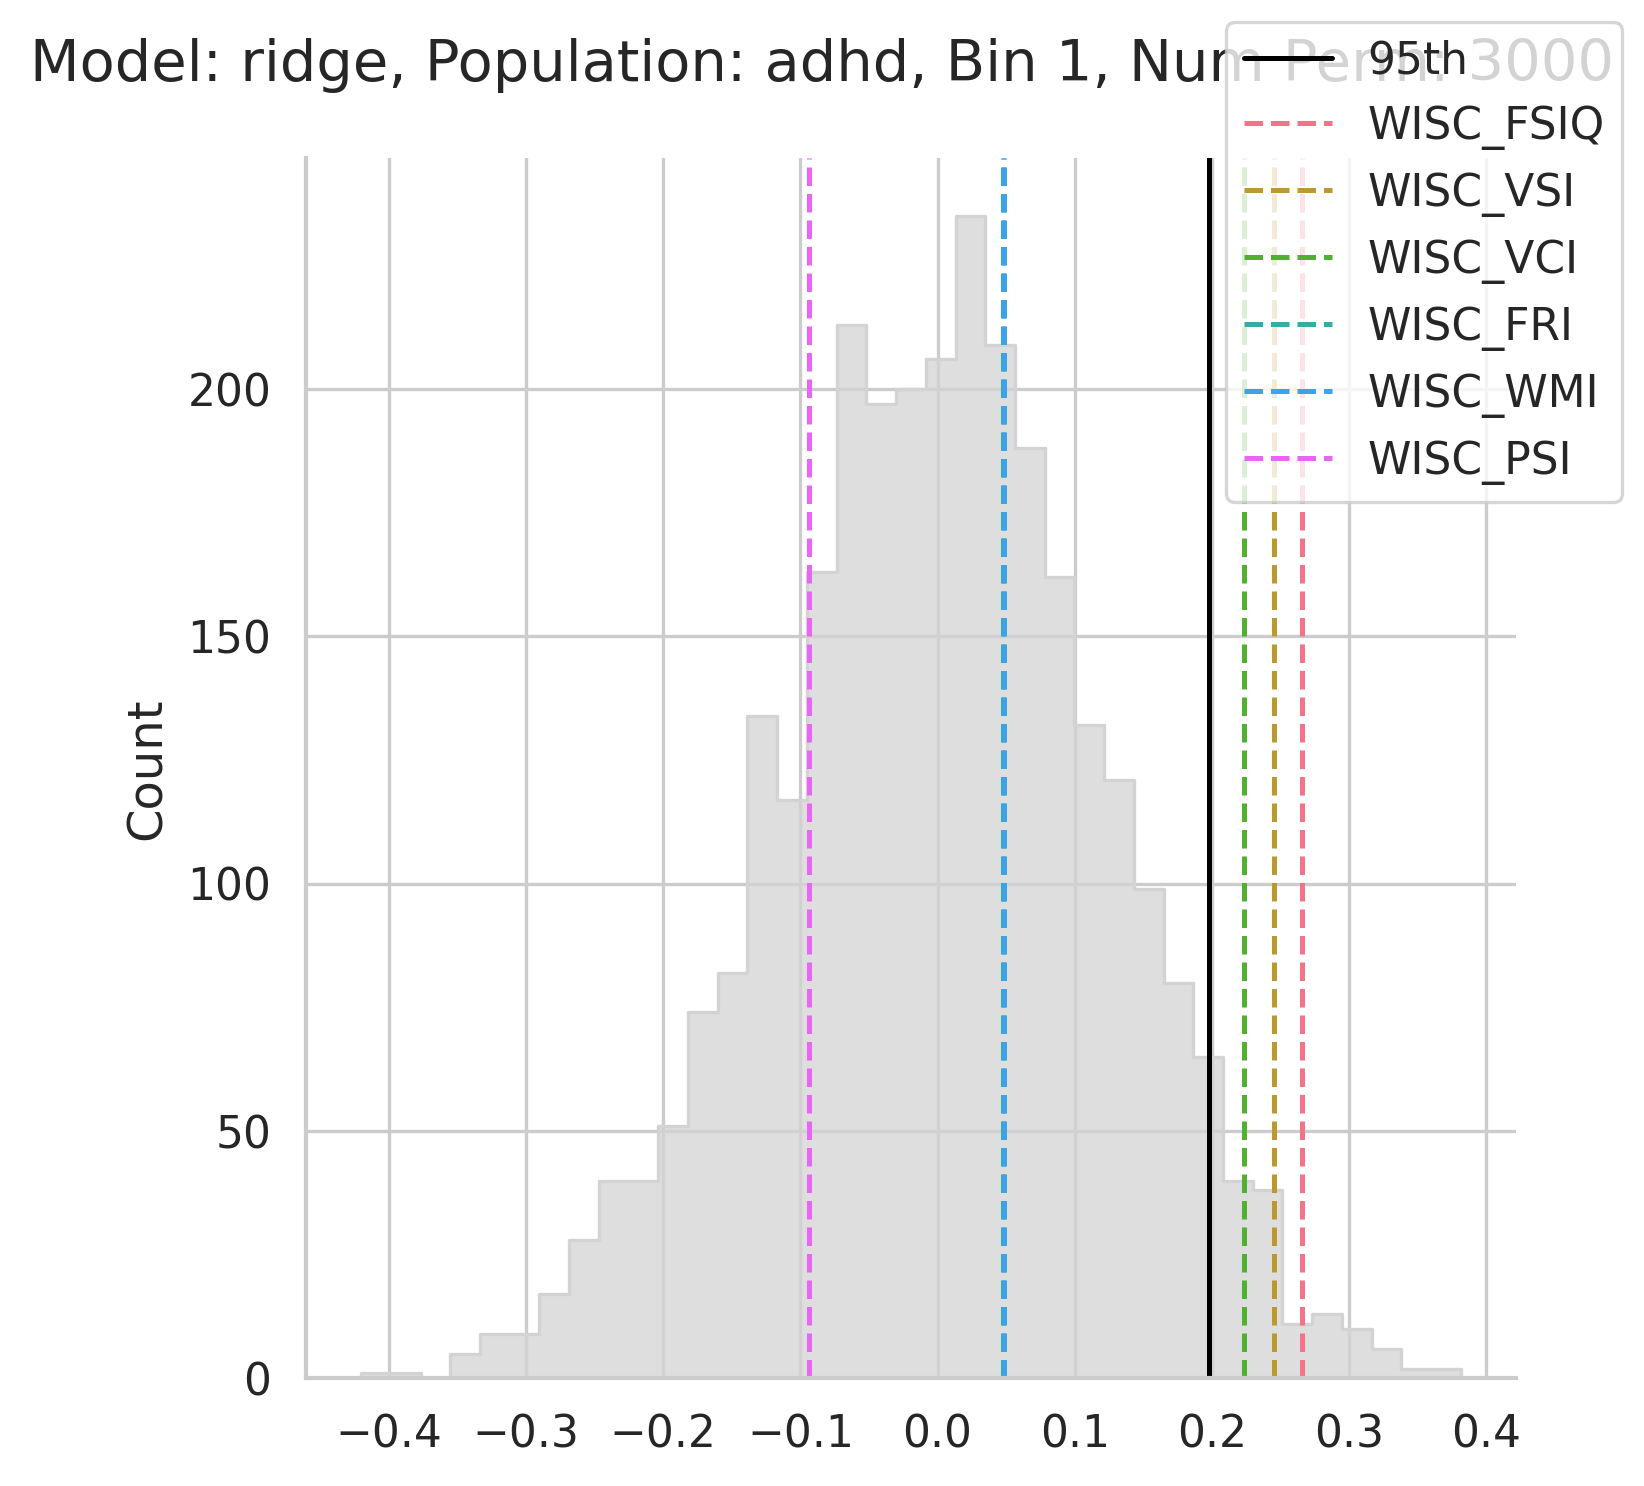

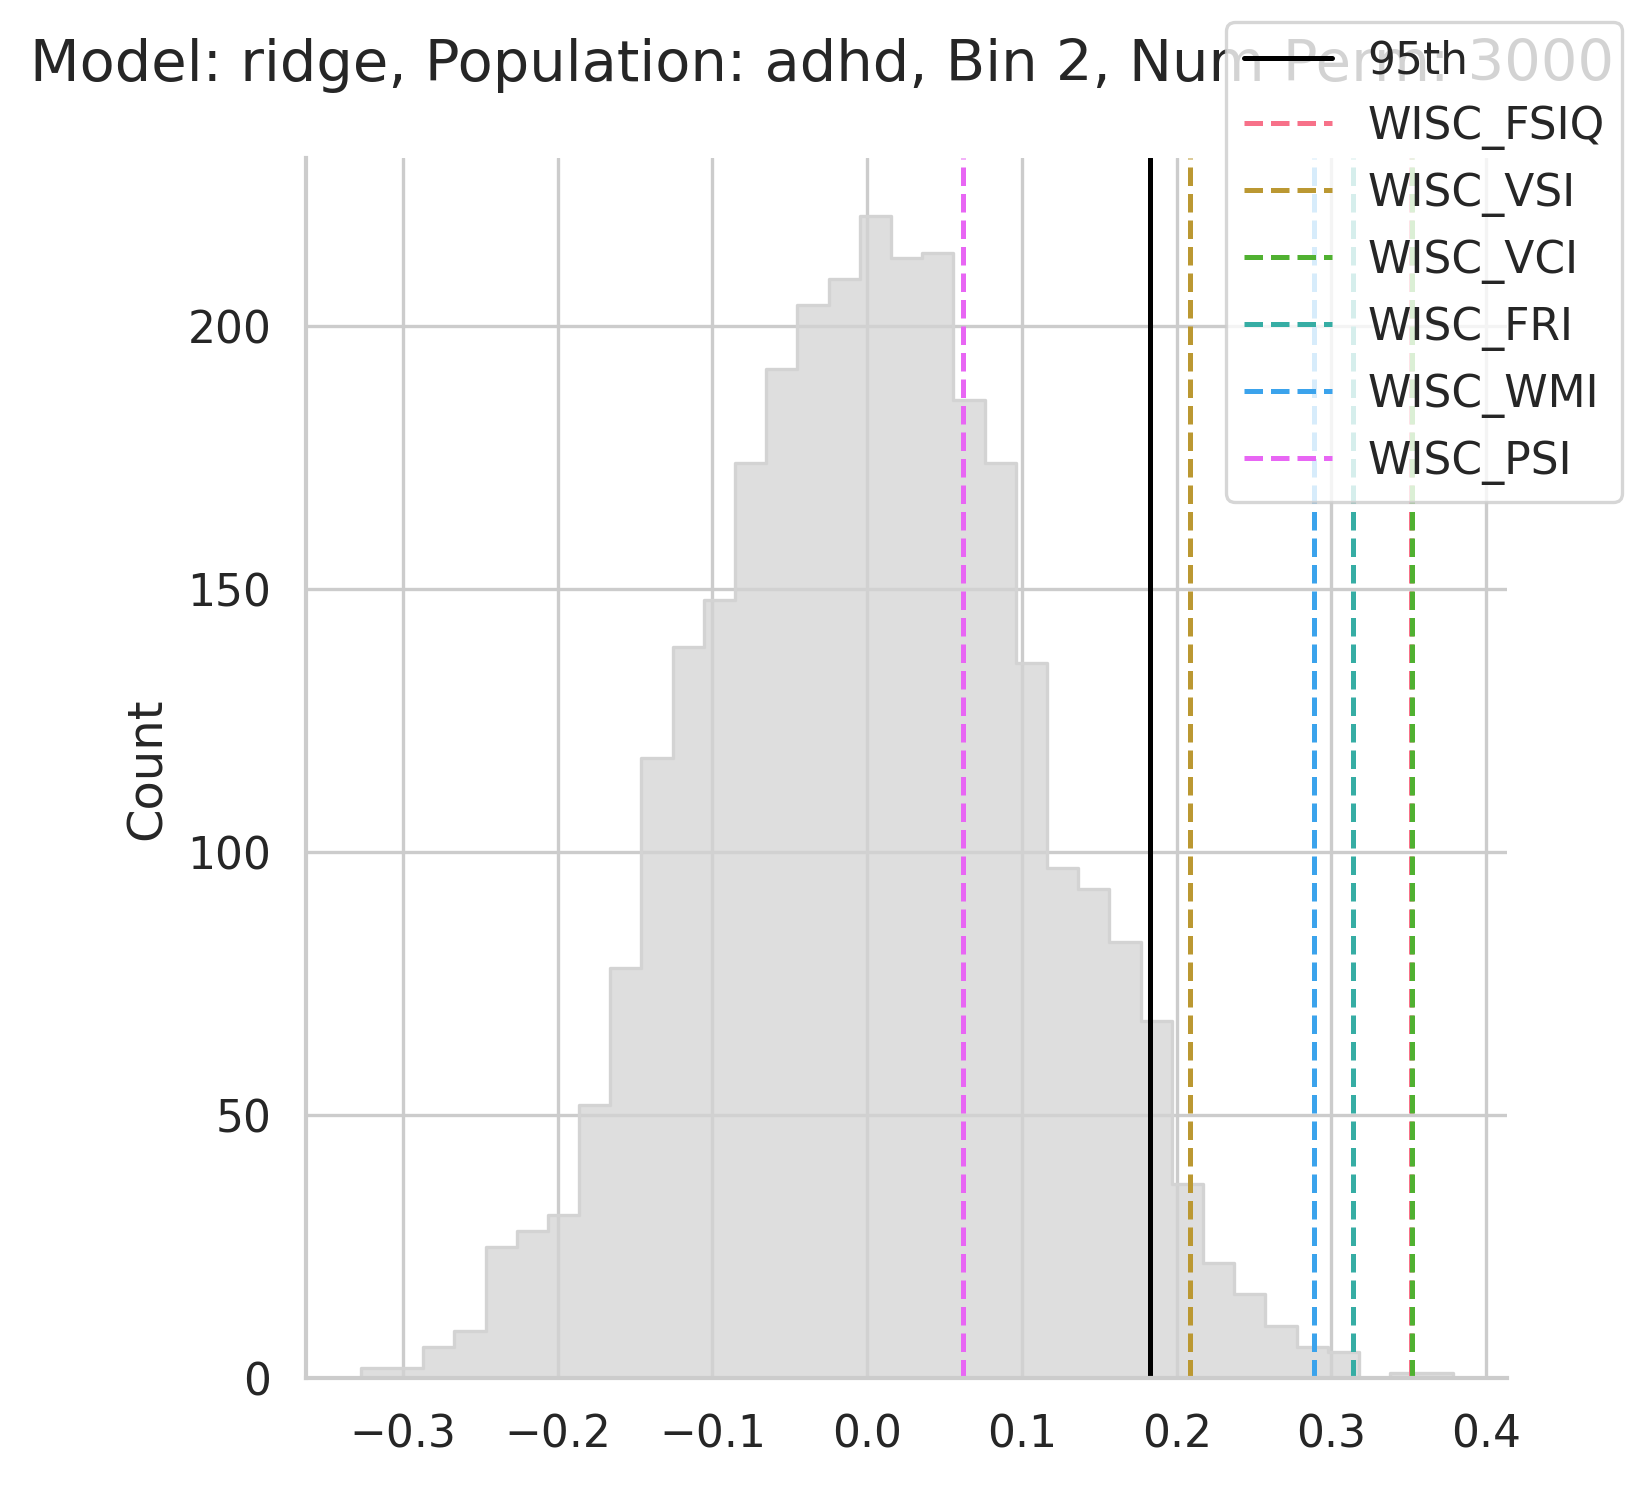

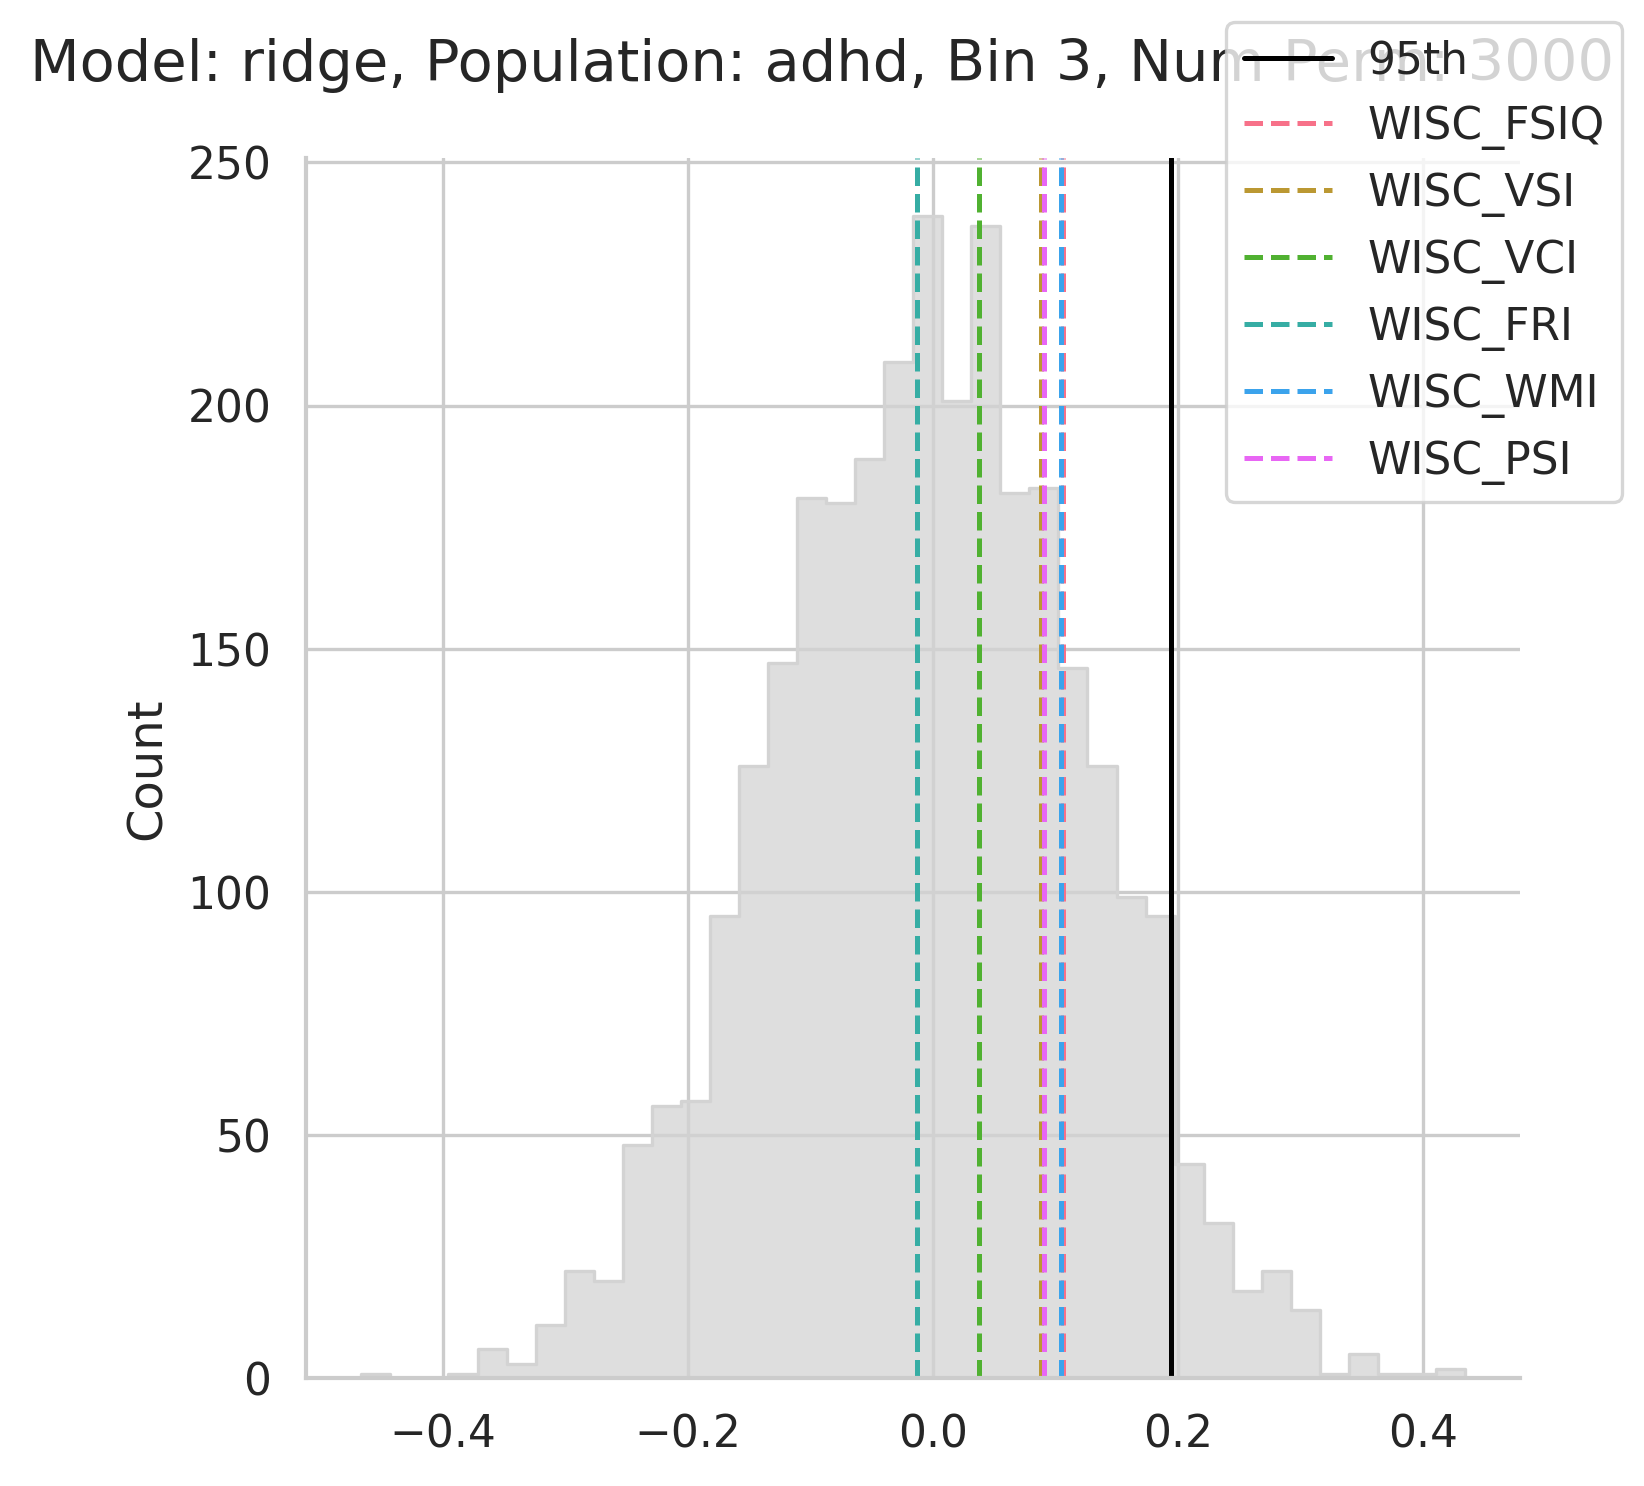

In [9]:
from common.binning import BIN_LABELS
from common.paths import RIDGE_RESULTS, RIDGE_PSCORES, PLS_RESULTS, PLS_PSCORES
from common.results import load_results, load_perm_score
from common.wisc import WISC_LEVEL

results, results_path = load_results(f'{model}_pts_{population}', RIDGE_RESULTS)

for bin_label in BIN_LABELS:
    bin_perm_scores = load_perm_score(f'{model}_{population}_{bin_label}_perm_scores', RIDGE_PSCORES)
    ninety_fifth_index = int(bin_perm_scores.shape[0] * 0.95)
    ninety_fifth_score = np.sort(bin_perm_scores)[ninety_fifth_index]
    
    g = sns.displot(bin_perm_scores, color='lightgrey', element="step")
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Model: {model}, Population: {population}, {bin_label}, Num Perm: {bin_perm_scores.shape[0]}')
    g.ax.axvline(ninety_fifth_score, label='95th', color='black')
    
    for target_idx, target in enumerate(WISC_LEVEL[5]):
        target_score = results.loc[(results['Bin'] == bin_label) & (results['Target'] == target)]['Score']
        target_score = target_score.to_list()[0]
        g.ax.axvline(target_score, label=target, ls='--', color=sns.color_palette("husl", 6)[target_idx])
    g.fig.legend()
        
# Discrete variant
# g = sns.displot(bin_perm_scores, palette="Set2", element="step")
# g.fig.subplots_adjust(top=0.85)
# g.fig.suptitle(f'Model: ridge, Target: {selected_target}, Train: Self, Test: Self, Population: ADHD, Num Perm: {N_PERM}')
# for col_val, ax in g.axes_dict.items():
#     bin_idx = col_val - 1
#     ax.axvline(true_score['Score'].iloc[bin_idx], ls="--", color=sns.color_palette("Set2")[bin_idx])